## CST 383: Intro to Data Science
# Project 2 

# Predicting Kickstarter Campaign Success
## Authors: Brianna Magallon, Tyler Pruitt, Rafael Reis

# Introduction: 
### In this project, we use the Kickstarter Projects dataset to predict whether a campaign will be successful or not based on features such as ...
### Dataset URL: https://www.kaggle.com/datasets/kemical/kickstarter-projects

In [39]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# plotting
sns.set_theme(style='whitegrid', context='notebook')
plt.rcParams['figure.figsize'] = 5,3

## Read the data

In [43]:
# df = pd.read_csv("ks-projects-201612.csv", low_memory = False)
df = pd.read_csv("ks-projects-201612.csv", encoding="cp1252", low_memory=False) # to make encoding work, at elast on macOS

In [45]:
df.columns = df.columns.str.strip()
df.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
268561,668353198,Comedy War,Theater,Theater,USD,2012-03-28 09:01:00,5000,2012-01-28 19:12:06,0,failed,0,US,0,NaN,NaN,NaN,NaN
7952,1046781560,Studio time for first album,Hip-Hop,Music,USD,2015-05-13 17:23:43,500,2015-04-13 17:23:43,36,failed,2,US,36,NaN,NaN,NaN,NaN
82602,1490653273,Pop Up Cinema,Movie Theaters,Film & Video,GBP,2014-08-31 16:56:36,3000,2014-08-01 16:56:36,15,failed,2,GB,25.37998065,NaN,NaN,NaN,NaN
59993,135650775,emmyart ~ greeting card launch,Art,Art,USD,2012-05-03 18:40:20,10000,2012-04-03 18:40:20,6438,failed,43,US,6438,NaN,NaN,NaN,NaN
54176,1321675573,R-Tronika in MEXICO !!,World Music,Music,USD,2013-07-08 01:59:57,1750,2013-06-03 01:59:57,179,failed,7,US,179,NaN,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323751 entries, 0 to 323750
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             323751 non-null  object 
 1   name           323747 non-null  object 
 2   category       323745 non-null  object 
 3   main_category  323750 non-null  object 
 4   currency       323750 non-null  object 
 5   deadline       323750 non-null  object 
 6   goal           323750 non-null  object 
 7   launched       323750 non-null  object 
 8   pledged        323750 non-null  object 
 9   state          323750 non-null  object 
 10  backers        323750 non-null  object 
 11  country        323750 non-null  object 
 12  usd pledged    319959 non-null  object 
 13  Unnamed: 13    625 non-null     object 
 14  Unnamed: 14    12 non-null      object 
 15  Unnamed: 15    4 non-null       object 
 16  Unnamed: 16    1 non-null       float64
dtypes: float64(1), object(16)
mem

## Data Exploration

In [19]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [23]:
df['state'].value_counts()

state
failed        168220
successful    113081
canceled       32354
live            4428
undefined       3555
               ...  
2312               1
320                1
477                1
1404               1
2634               1
Name: count, Length: 410, dtype: int64

In [25]:
df[df['state'] == "canceled"].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29 18:14:43,125000,2014-04-24 18:14:43,8233,canceled,58,US,8233,NaN,NaN,NaN,NaN
8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10 21:55:48,65000,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,NaN,NaN,NaN,NaN
59,1000256760,"Raise the Woof, expanding the love (Canceled)",Design,Design,CAD,2015-08-07 21:46:53,15000,2015-07-08 21:46:53,700,canceled,6,CA,553.324254,NaN,NaN,NaN,NaN
61,1000260691,Gizbee Unlimited Removable Storage for Your T...,Gadgets,Technology,USD,2016-03-25 19:30:27,87000,2016-02-29 20:30:27,2030,canceled,15,US,2030,NaN,NaN,NaN,NaN


In [96]:
dftest = df[df['country'] == 'US']
dftest = dftest.drop(columns=["Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"])

KeyError: "['Unnamed: 13 ', 'Unnamed: 14 ', 'Unnamed: 15 ', 'Unnamed: 16 '] not found in axis"

In [ ]:
dftest['category'].value_counts()

In [55]:
dftest['main_category'].value_counts()

main_category
Film & Video    48086
Music           39517
Publishing      27972
Games           20392
Art             19640
Design          18106
Technology      17913
Food            17479
Fashion         13943
Theater          8138
Comics           7392
Photography      7389
Crafts           5570
Journalism       3092
Dance            2935
Name: count, dtype: int64

#### We want to see the different outcomes the campaigns had, and which ones will be most relevant for our predictions. 

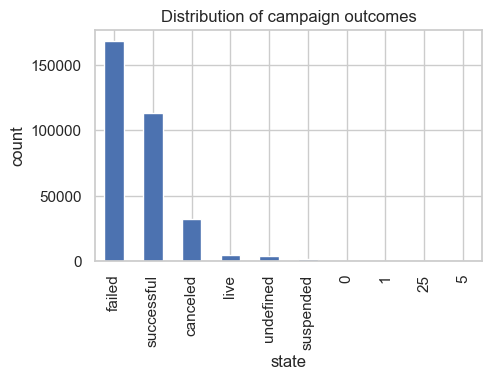

In [27]:
state_counts = df['state'].value_counts().head(10)
state_counts.plot.bar()
plt.title('Distribution of campaign outcomes')
plt.xlabel('state')
plt.ylabel('count')
plt.show()

#### Here we are able to see that "Failed" and "Successful" are the most common. We want to explore if "canceled" should fall under the "failed" category.

#### We want to see how Kickstarter campaigns are distributed across different project categories. This will help us understand which categories are most popular and whether there is a class imbalance. 

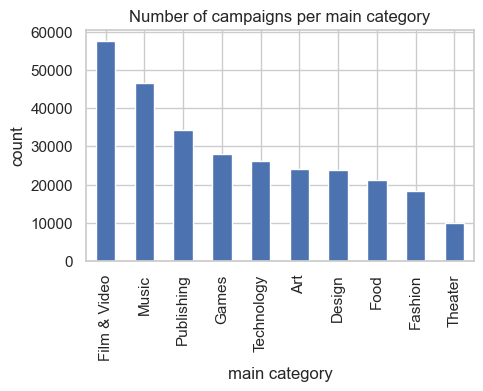

In [416]:
df['main_category '].value_counts().head(10).plot.bar()
plt.title("Number of campaigns per main category")
plt.xlabel("main category")
plt.ylabel("count")
plt.show()

In [29]:
df.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
105256,1625142392,Uncle Giff's Christmas Special,Musical,Theater,USD,2014-09-28 05:59:00,2500,2014-09-02 21:49:26,2591,successful,47,US,2591,NaN,NaN,NaN,NaN
37996,1225444603,Combat Paper Program,Art,Art,USD,2012-03-21 03:28:03,15000,2012-02-20 04:28:03,19000,successful,321,US,19000,NaN,NaN,NaN,NaN
163171,1970392912,The Crystal Crypt: Based on a short story by P...,Shorts,Film & Video,USD,2013-03-18 07:59:00,25000,2013-01-28 18:46:47,15463,failed,152,US,15463,NaN,NaN,NaN,NaN
119994,1712250398,What is Janet Lynn?,Shorts,Film & Video,USD,2012-04-01 22:27:08,6000,2012-03-02 22:27:08,6050,successful,57,US,6050,NaN,NaN,NaN,NaN
181822,2082919392,MyTown's Kitchen Project,Food,Food,USD,2012-06-01 05:38:24,7000,2012-05-02 05:38:24,245,failed,4,US,245,NaN,NaN,NaN,NaN
48871,129044575,A Magazine for the Future,Print,Journalism,USD,2015-06-01 20:04:09,10000,2015-04-17 20:04:09,75,failed,2,US,75,NaN,NaN,NaN,NaN
268111,665723203,Celebrating the enduring gesture,Technology,Technology,AUD,2016-06-21 05:13:57,13500,2016-05-06 05:13:57,131,failed,5,AU,98.00034413,NaN,NaN,NaN,NaN
75410,1448256549,MeterMagic,Apps,Technology,USD,2016-04-15 15:52:39,80000,2016-03-01 15:52:39,72,failed,5,US,72,NaN,NaN,NaN,NaN
275082,707402296,Dream Killa (Music Video),Film & Video,Film & Video,USD,2013-06-06 23:31:09,8000,2013-04-07 23:31:09,499,failed,1,US,499,NaN,NaN,NaN,NaN
130724,1776035212,Wind Playground,Sculpture,Art,USD,2012-04-22 01:44:02,25000,2012-02-22 01:44:02,25253,successful,118,US,25253,NaN,NaN,NaN,NaN


## Preprocessing /Data Cleaning

In [65]:
df = df.drop(columns=["Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16"])

In [33]:
df.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
35801,1212826883,Standing Out In The Crowd,Documentary,Film & Video,USD,2015-04-29 21:42:11,24000,2015-03-30 21:42:11,2794,failed,40,US,2794
310207,918768928,Psycho University (Canceled),Thrillers,Film & Video,USD,2016-05-24 02:00:25,8769,2016-03-25 01:00:25,0,canceled,0,US,0
6873,1040396379,Kitchen Shop*Eat*Learn,Food,Food,USD,2013-12-23 13:05:02,56000,2013-11-23 13:05:02,4061,failed,19,US,4061
241656,50677284,Hope Is Growing t-shirts promote early detection,Apparel,Fashion,USD,2014-12-03 23:11:49,2489,2014-11-03 23:11:49,0,failed,0,US,0
152833,190828137,Apex Racewear : Affordable racewear for everyone,Apparel,Fashion,GBP,2015-02-26 14:24:00,3500,2015-01-27 14:24:00,1,failed,1,GB,1.49968207
200807,262857898,No Way Out,Documentary,Film & Video,USD,2014-05-28 09:56:17,100000,2014-03-29 08:56:17,2562,failed,31,US,2562
228373,42775922,15x15 Clam Shell Digital Sublimation Heat pres...,Crafts,Crafts,USD,2015-04-29 17:03:46,400,2015-03-30 17:03:46,1,failed,1,US,1
166302,1989487106,TruStump Deer and Wildlife Feeder,Product Design,Design,USD,2015-12-02 18:50:58,47500,2015-11-02 18:50:58,6650,failed,16,US,6650
95794,1569029107,Kikeriki! - the cool band for cool kids - Debu...,Pop,Music,AUD,2013-12-20 10:47:19,52000,2013-11-20 10:47:19,7592,failed,37,AU,7114.93640936
157584,1937497350,Fujian Trader: A board game adventure in Chine...,Tabletop Games,Games,USD,2015-03-19 22:30:00,39500,2015-02-11 16:08:53,40032.5,successful,464,US,40032.5


In [67]:
df[df.isnull().any(axis=1)].sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
210342,319910653,Summer Train Tour 2015: Laying tracks for new ...,Music,Music,USD,2015-07-01 02:00:00,1200,2015-06-13 00:44:04,1270,undefined,0,"N,""0",NaN
70209,1417038264,COASTLINE CLEANUP COVERAGE!,Film & Video,Film & Video,USD,2016-03-01 03:00:00,4500,2016-01-29 00:46:57,0,undefined,0,"N,""0",NaN
160728,195600899,Erickson T aka DJ KING KROY | Music Studio Fun...,Music,Music,USD,2015-11-13 02:50:12,2000,2015-10-14 02:50:12,0,undefined,0,"N,""0",NaN
3289,1019636732,Love Letters to GOD,Publishing,Publishing,USD,2016-01-15 02:00:00,4789,2015-12-14 00:53:55,10,undefined,0,"N,""0",NaN
270970,683150354,'Nesting Grounds' Festival Funds,Film & Video,Film & Video,USD,2014-08-25 19:17:08,1500,2014-07-26 19:17:08,2516,undefined,0,"N,""0",NaN


In [69]:
df = df.rename(columns={"state ": "state"}) # There's a trailing space in the column name that is annoying
df = df[df['state'].isin(["successful", "failed	", "canceled"])]

In [71]:
print("Rows still with null values: ", len(df[df.isnull().any(axis=1)]))
df[df.isnull().any(axis=1)].sample(5)

Rows still with null values:  127


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
147774,1877871589,Unlimited Vision: Dreams From Beyond the Blin...,Music,Music,USD,2013-04-11 07:16:43,8000,2013-03-12 06:16:43,8088,successful,0,"N,""0",NaN
179856,2071129817,"Thank God For Science ""Volume 1""",Music,Music,USD,2016-05-06 16:40:21,1200,2016-04-06 16:40:21,1507,successful,0,"N,""0",NaN
120699,1716565793,Centuries of SummerDays - an album of Shakespe...,Music,Music,DKK,2016-05-01 21:22:00,8500,2016-03-31 22:43:48,9048,successful,0,"N,""0",NaN
86395,1512908710,Join Tim Snider in making his new album!,Music,Music,USD,2013-04-07 18:36:41,6000,2013-03-08 18:36:41,7318,successful,0,"N,""0",NaN
289415,793819587,"Crystal Bowls, Mantra, and Meditation- Soulful...",Music,Music,USD,2016-04-25 02:27:00,5500,2016-03-25 06:44:28,5514,successful,0,"N,""0",NaN


It seems the vast majority of Kickstarter campaigns with null values fall under the Music and Film categories, often with zero backers. The campaign states vary, which likely reflects that creating music or films isn’t strongly tied to financial backing (there’s probably a joke in there somewhere).

Since these projects lack key information like backer count or country and only account for 127 rows, we’ll remove them from the dataset.

In [73]:
df = df.dropna()
len(df[df.isnull().any(axis=1)]) # checking
df.info() # Current state

<class 'pandas.core.frame.DataFrame'>
Index: 145308 entries, 3 to 323746
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             145308 non-null  object
 1   name           145308 non-null  object
 2   category       145308 non-null  object
 3   main_category  145308 non-null  object
 4   currency       145308 non-null  object
 5   deadline       145308 non-null  object
 6   goal           145308 non-null  object
 7   launched       145308 non-null  object
 8   pledged        145308 non-null  object
 9   state          145308 non-null  object
 10  backers        145308 non-null  object
 11  country        145308 non-null  object
 12  usd pledged    145308 non-null  object
dtypes: object(13)
memory usage: 15.5+ MB


In [75]:
df['backers'].info()

<class 'pandas.core.series.Series'>
Index: 145308 entries, 3 to 323746
Series name: backers
Non-Null Count   Dtype 
--------------   ----- 
145308 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [77]:
df['goal'] = pd.to_numeric(df['goal'], errors='coerce').astype(int)
df.dropna(subset=['goal'], inplace=True)
print(df['goal'])

3          19500
4          50000
5           1000
7         125000
8          65000
           ...  
323740       500
323742      5000
323743     20000
323745      5500
323746     50000
Name: goal, Length: 145308, dtype: int32


In [79]:
#Dropping all rows outside the US
df = df[df['country'] == 'US']